<a href="https://colab.research.google.com/github/antipovaya/probability-theory-and-mathematical-statistics/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7(%D0%BF%D0%B0%D1%80%D0%B0%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D1%82%D0%B5%D1%81%D1%82%D1%8B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Тестирование гипотез**
1. Нулевая и альтернативная гипотезы (H0 и H1)  

Нулевая гипотеза (H0): гипотеза об отсутствии эффекта, разницы или связи. Это то, что мы пытаемся опровергнуть.
Пример: H0: μ = μ0 (среднее значение равно некоторому предполагаемому значению)

Альтернативная гипотеза (H1): гипотеза, которая противоречит нулевой. Это то, что мы хотим доказать.
Примеры:

H1: μ ≠ μ0 (двусторонняя альтернатива)

H1: μ > μ0 (правосторонняя)

H1: μ < μ0 (левосторонняя)

2. Уровень значимости (α)  

Уровень значимости α — это вероятность отклонить нулевую гипотезу, когда она верна (ошибка I рода). Обычно выбирают α = 0.05 (5%), но иногда используют 0.01 или 0.1.

На графике распределения при условии верности H0, α — это площадь критической области (хвостов распределения). Если наблюдаемая статистика попадает в критическую область, мы отвергаем H0.

3. p-value  

p-value (p-значение) — это вероятность получить такие же или более крайние результаты при условии, что нулевая гипотеза верна.

Если p-value < α, то мы отвергаем H0.

Если p-value ≥ α, то у нас нет оснований отвергать H0.

4. Z-критерий и t-критерий Стьюдента  

Z-критерий
Используется, когда:

Известно стандартное отклонение генеральной совокупности (σ)

Выборка большого размера (обычно n > 30) и σ известна или оценена по большой выборке

Формула для Z-статистики:

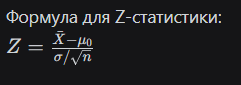

t-критерий Стьюдента  

Используется, когда:

Стандартное отклонение генеральной совокупности неизвестно

Размер выборки небольшой (обычно n < 30)

Формула для t-статистики:  
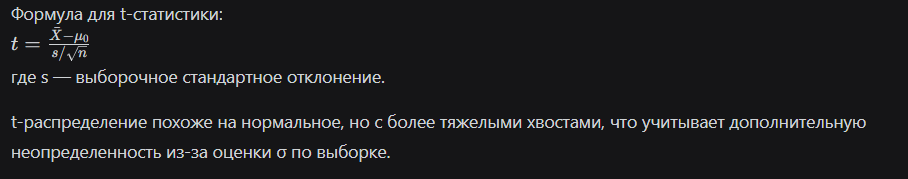



**Пример 1: Z-тест**  

Предположим, мы тестируем гипотезу о среднем росте в популяции. Известно, что стандартное отклонение роста равно 5 см. Мы хотим проверить, отличается ли средний рост в нашей выборке (n=100) от 170 см.

H0: μ = 170
H1: μ ≠ 170

In [1]:
import numpy as np
from scipy import stats

# Предположим, у нас есть выборка из 100 наблюдений
np.random.seed(42)
sample = np.random.normal(loc=172, scale=5, size=100)  # среднее 172, стандартное отклонение 5

# Известные параметры
mu0 = 170
sigma = 5  # известно стандартное отклонение генеральной совокупности
n = len(sample)
sample_mean = np.mean(sample)

# Расчет Z-статистики
z_stat = (sample_mean - mu0) / (sigma / np.sqrt(n))
print(f"Z-статистика: {z_stat}")

# Расчет p-value для двустороннего теста
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
print(f"p-value: {p_value}")

# Принимаем решение на уровне значимости 0.05
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

Z-статистика: 2.961534826059051
p-value: 0.0030610987278789636
Отвергаем нулевую гипотезу


**Пример 2: t-тест**  

Теперь предположим, что стандартное отклонение генеральной совокупности неизвестно. Мы используем t-тест.

In [2]:
# Используем ту же выборку
# Оценим стандартное отклонение по выборке
s = np.std(sample, ddof=1)  # ddof=1 для несмещенной оценки

# Расчет t-статистики
t_stat = (sample_mean - mu0) / (s / np.sqrt(n))
print(f"t-статистика: {t_stat}")

# Расчет p-value для двустороннего теста
# degrees of freedom (df) = n - 1
p_value_t = 2 * (1 - stats.t.cdf(abs(t_stat), df=n-1))
print(f"p-value (t-тест): {p_value_t}")

# Решение
if p_value_t < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

# Встроенная функция для t-теста
t_stat_builtin, p_value_builtin = stats.ttest_1samp(sample, mu0)
print(f"t-статистика (встроенная): {t_stat_builtin}")
print(f"p-value (встроенная): {p_value_builtin}")

t-статистика: 3.260997337856819
p-value (t-тест): 0.001523161703725684
Отвергаем нулевую гипотезу
t-статистика (встроенная): 3.2609973378568187
p-value (встроенная): 0.0015231617037256466


**Визуализация критических областей и p-value**  

Давайте визуализируем критическую область и p-value для t-теста.

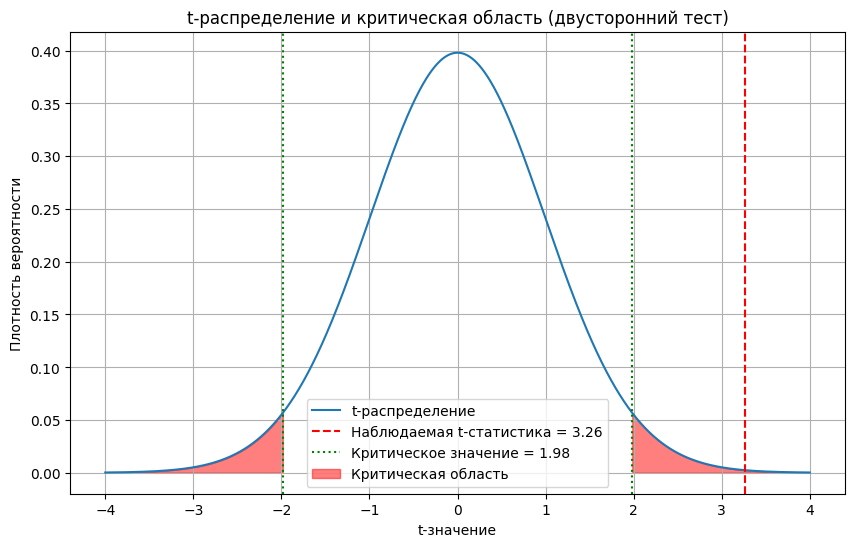

In [3]:
import matplotlib.pyplot as plt

# Параметры t-распределения
df = n - 1
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

# Критические значения для двустороннего теста
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, df)

# График
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='t-распределение')
plt.axvline(t_stat, color='red', linestyle='--', label=f'Наблюдаемая t-статистика = {t_stat:.2f}')
plt.axvline(t_critical, color='green', linestyle=':', label=f'Критическое значение = {t_critical:.2f}')
plt.axvline(-t_critical, color='green', linestyle=':')

# Закрашиваем критические области
x_fill_right = np.linspace(t_critical, 4, 100)
y_fill_right = stats.t.pdf(x_fill_right, df)
plt.fill_between(x_fill_right, y_fill_right, color='red', alpha=0.5, label='Критическая область')

x_fill_left = np.linspace(-4, -t_critical, 100)
y_fill_left = stats.t.pdf(x_fill_left, df)
plt.fill_between(x_fill_left, y_fill_left, color='red', alpha=0.5)

plt.title('t-распределение и критическая область (двусторонний тест)')
plt.xlabel('t-значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()

**Объяснение p-value на графике**
На графике выше мы видим:

Кривую t-распределения с n-1 степенями свободы.

Вертикальные линии: красная пунктирная — наше наблюдаемое значение t-статистики, зеленые пунктирные — критические значения.

Закрашенные красным критические области (хвосты распределения) — это области, в которых мы отвергаем H0.

p-value — это площадь под кривой распределения за пределами наблюдаемого значения t-статистики (в обе стороны для двустороннего теста). Если эта площадь меньше α, мы отвергаем H0.

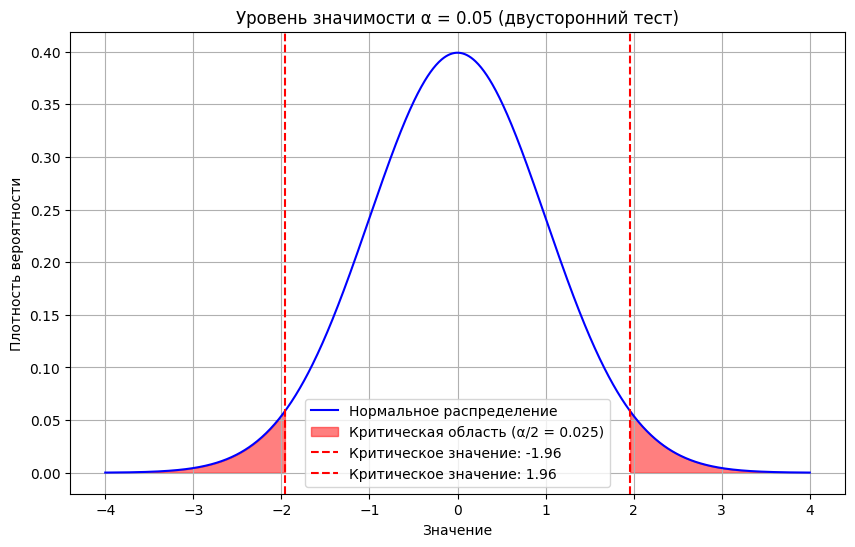

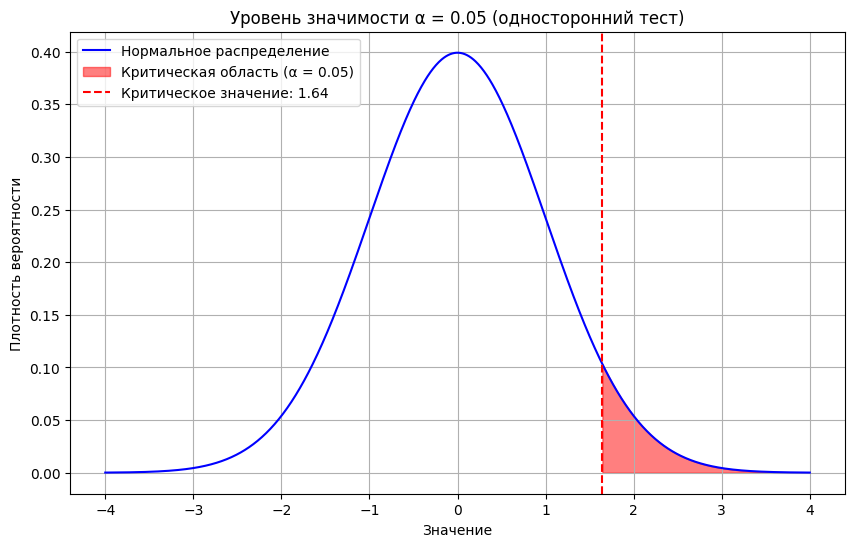

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Визуализация уровня значимости на графике
def plot_alpha_level(mu=0, sigma=1, alpha=0.05, two_tailed=True):
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    y = stats.norm.pdf(x, mu, sigma)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'b-', label='Нормальное распределение')

    if two_tailed:
        # Двусторонний тест
        critical_left = stats.norm.ppf(alpha/2, mu, sigma)
        critical_right = stats.norm.ppf(1 - alpha/2, mu, sigma)

        # Закрашиваем критические области
        x_fill_left = np.linspace(mu - 4*sigma, critical_left, 100)
        y_fill_left = stats.norm.pdf(x_fill_left, mu, sigma)
        plt.fill_between(x_fill_left, y_fill_left, color='red', alpha=0.5, label=f'Критическая область (α/2 = {alpha/2:.3f})')

        x_fill_right = np.linspace(critical_right, mu + 4*sigma, 100)
        y_fill_right = stats.norm.pdf(x_fill_right, mu, sigma)
        plt.fill_between(x_fill_right, y_fill_right, color='red', alpha=0.5)

        plt.axvline(critical_left, color='red', linestyle='--', label=f'Критическое значение: {critical_left:.2f}')
        plt.axvline(critical_right, color='red', linestyle='--', label=f'Критическое значение: {critical_right:.2f}')
    else:
        # Односторонний тест (правосторонний)
        critical = stats.norm.ppf(1 - alpha, mu, sigma)

        x_fill = np.linspace(critical, mu + 4*sigma, 100)
        y_fill = stats.norm.pdf(x_fill, mu, sigma)
        plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label=f'Критическая область (α = {alpha})')

        plt.axvline(critical, color='red', linestyle='--', label=f'Критическое значение: {critical:.2f}')

    plt.title(f'Уровень значимости α = {alpha} ({"двусторонний" if two_tailed else "односторонний"} тест)')
    plt.xlabel('Значение')
    plt.ylabel('Плотность вероятности')
    plt.legend()
    plt.grid(True)
    plt.show()

# Примеры
plot_alpha_level(alpha=0.05, two_tailed=True)  # Двусторонний тест
plot_alpha_level(alpha=0.05, two_tailed=False) # Односторонний тест

In [5]:
# Пример применения z-критерия и t-критерия
def hypothesis_test(sample, mu0, sigma=None, alpha=0.05, test_type='two-tailed'):
    n = len(sample)
    sample_mean = np.mean(sample)

    if sigma is not None:
        # Z-критерий (известно sigma)
        z_stat = (sample_mean - mu0) / (sigma / np.sqrt(n))

        if test_type == 'two-tailed':
            p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
            critical_left = stats.norm.ppf(alpha/2)
            critical_right = stats.norm.ppf(1 - alpha/2)
        elif test_type == 'right-tailed':
            p_value = 1 - stats.norm.cdf(z_stat)
            critical = stats.norm.ppf(1 - alpha)
        else:  # left-tailed
            p_value = stats.norm.cdf(z_stat)
            critical = stats.norm.ppf(alpha)

        test_name = "Z-тест"
        statistic = z_stat
    else:
        # t-критерий (неизвестно sigma)
        s = np.std(sample, ddof=1)  # несмещенная оценка
        t_stat = (sample_mean - mu0) / (s / np.sqrt(n))
        df = n - 1  # степени свободы

        if test_type == 'two-tailed':
            p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))
            critical_left = stats.t.ppf(alpha/2, df)
            critical_right = stats.t.ppf(1 - alpha/2, df)
        elif test_type == 'right-tailed':
            p_value = 1 - stats.t.cdf(t_stat, df)
            critical = stats.t.ppf(1 - alpha, df)
        else:  # left-tailed
            p_value = stats.t.cdf(t_stat, df)
            critical = stats.t.ppf(alpha, df)

        test_name = "t-тест"
        statistic = t_stat

    # Принятие решения
    if p_value < alpha:
        decision = "Отвергаем H₀"
    else:
        decision = "Не отвергаем H₀"

    # Вывод результатов
    print(f"{test_name} результаты:")
    print(f"Выборочное среднее: {sample_mean:.4f}")
    print(f"Тестовая статистика: {statistic:.4f}")
    print(f"P-значение: {p_value:.4f}")
    print(f"Решение: {decision} (α = {alpha})")

    return statistic, p_value, decision

# Пример использования
np.random.seed(42)
sample = np.random.normal(loc=105, scale=15, size=30)  # Среднее 105, std 15

# Z-тест (предположим, что знаем sigma = 15)
print("Z-тест (известно sigma):")
z_result = hypothesis_test(sample, mu0=100, sigma=15, alpha=0.05, test_type='two-tailed')

print("\n" + "="*50 + "\n")

# t-тест (не знаем sigma)
print("t-тест (неизвестно sigma):")
t_result = hypothesis_test(sample, mu0=100, sigma=None, alpha=0.05, test_type='two-tailed')

Z-тест (известно sigma):
Z-тест результаты:
Выборочное среднее: 102.1778
Тестовая статистика: 0.7952
P-значение: 0.4265
Решение: Не отвергаем H₀ (α = 0.05)


t-тест (неизвестно sigma):
t-тест результаты:
Выборочное среднее: 102.1778
Тестовая статистика: 0.8836
P-значение: 0.3842
Решение: Не отвергаем H₀ (α = 0.05)


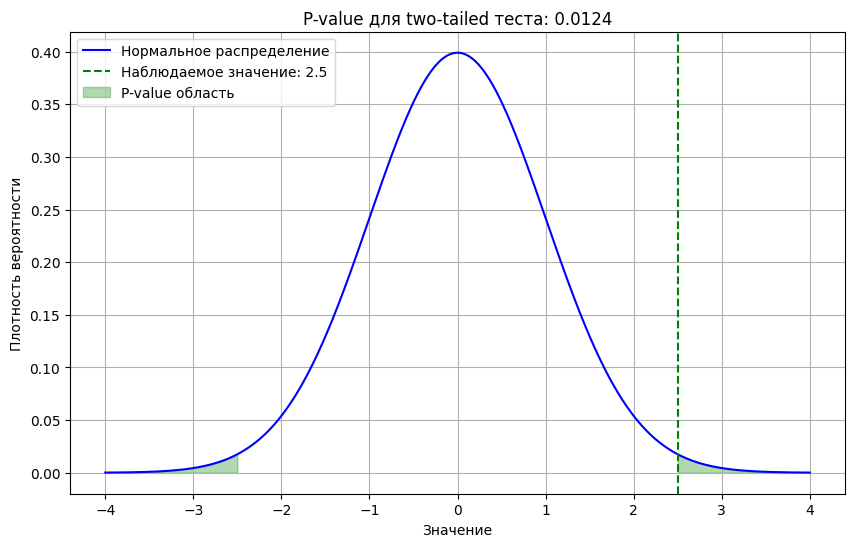

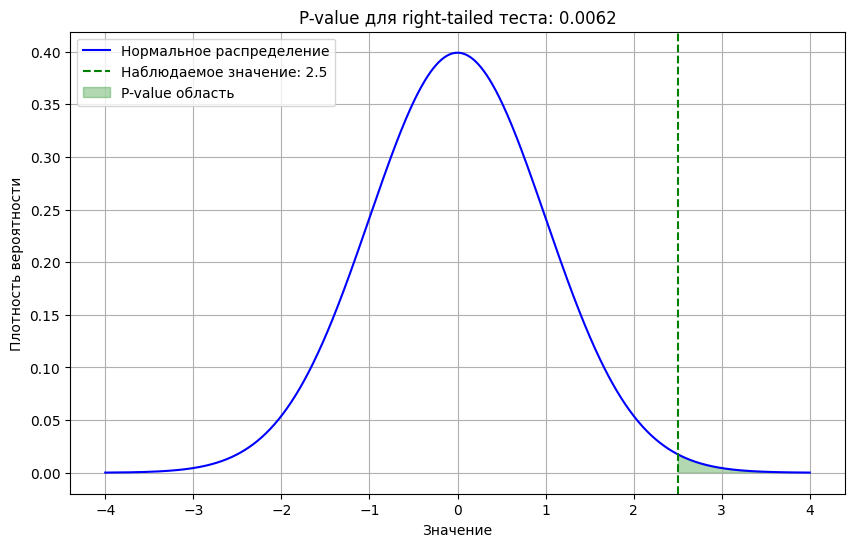

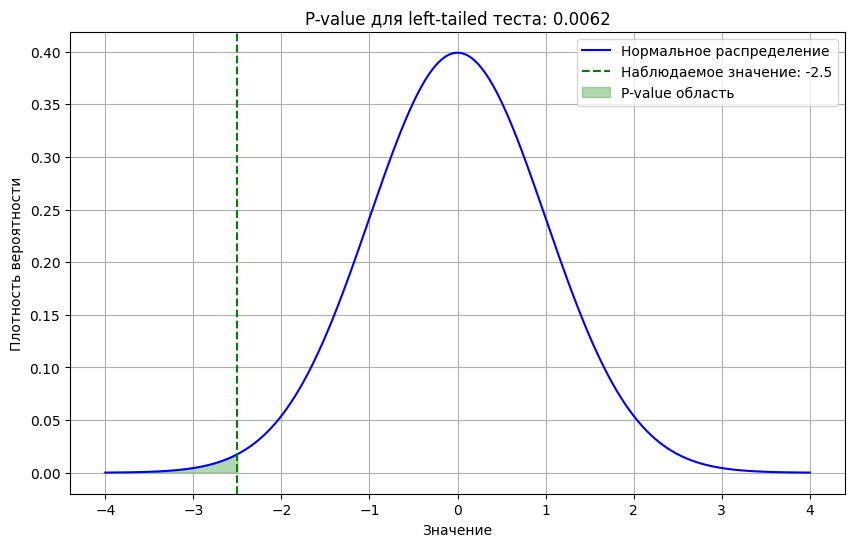

In [6]:
# Визуализация p-value
def plot_p_value(mu=0, sigma=1, observed_value=2.5, test_type='two-tailed'):
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    y = stats.norm.pdf(x, mu, sigma)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'b-', label='Нормальное распределение')
    plt.axvline(observed_value, color='green', linestyle='--', label=f'Наблюдаемое значение: {observed_value}')

    if test_type == 'two-tailed':
        # Двусторонний тест
        p_value = 2 * (1 - stats.norm.cdf(abs(observed_value)))

        # Закрашиваем области, соответствующие p-value
        x_fill_left = np.linspace(mu - 4*sigma, -abs(observed_value), 100)
        y_fill_left = stats.norm.pdf(x_fill_left, mu, sigma)
        plt.fill_between(x_fill_left, y_fill_left, color='green', alpha=0.3, label=f'P-value область')

        x_fill_right = np.linspace(abs(observed_value), mu + 4*sigma, 100)
        y_fill_right = stats.norm.pdf(x_fill_right, mu, sigma)
        plt.fill_between(x_fill_right, y_fill_right, color='green', alpha=0.3)

    elif test_type == 'right-tailed':
        # Правосторонний тест
        p_value = 1 - stats.norm.cdf(observed_value)

        x_fill = np.linspace(observed_value, mu + 4*sigma, 100)
        y_fill = stats.norm.pdf(x_fill, mu, sigma)
        plt.fill_between(x_fill, y_fill, color='green', alpha=0.3, label=f'P-value область')

    else:  # left-tailed
        # Левосторонний тест
        p_value = stats.norm.cdf(observed_value)

        x_fill = np.linspace(mu - 4*sigma, observed_value, 100)
        y_fill = stats.norm.pdf(x_fill, mu, sigma)
        plt.fill_between(x_fill, y_fill, color='green', alpha=0.3, label=f'P-value область')

    plt.title(f'P-value для {test_type} теста: {p_value:.4f}')
    plt.xlabel('Значение')
    plt.ylabel('Плотность вероятности')
    plt.legend()
    plt.grid(True)
    plt.show()

# Примеры визуализации p-value
plot_p_value(observed_value=2.5, test_type='two-tailed')    # Двусторонний тест
plot_p_value(observed_value=2.5, test_type='right-tailed')  # Правосторонний тест
plot_p_value(observed_value=-2.5, test_type='left-tailed')  # Левосторонний тест

In [7]:
# Полный пример: Сравнение двух методов обучения
np.random.seed(42)

# Генерируем данные
# Традиционный метод
traditional = np.random.normal(loc=75, scale=10, size=30)
# Новый метод
new_method = np.random.normal(loc=82, scale=10, size=35)

# Проверяем нормальность распределения (необязательно, но полезно)
_, p_traditional = stats.shapiro(traditional)
_, p_new = stats.shapiro(new_method)
print(f"P-value теста Шапиро-Уилка для традиционного метода: {p_traditional:.4f}")
print(f"P-value теста Шапиро-Уилка для нового метода: {p_new:.4f}")

# Проверяем равенство дисперсий
_, p_var = stats.levene(traditional, new_method)
print(f"P-value теста Ливена на равенство дисперсий: {p_var:.4f}")

# Проводим t-тест для независимых выборок
t_stat, p_value = stats.ttest_ind(new_method, traditional, equal_var=True)
print(f"t-статистика: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Принимаем решение
alpha = 0.05
if p_value < alpha:
    print("Отвергаем H₀: Новый метод обучения статистически значимо лучше")
else:
    print("Не отвергаем H₀: Нет статистически значимых различий между методами")

# Дополнительно: вычисляем доверительный интервал для разницы средних
diff_mean = np.mean(new_method) - np.mean(traditional)
n1, n2 = len(new_method), len(traditional)
pooled_std = np.sqrt(((n1-1)*np.std(new_method, ddof=1)**2 + (n2-1)*np.std(traditional, ddof=1)**2) / (n1+n2-2))
se = pooled_std * np.sqrt(1/n1 + 1/n2)
ci_low = diff_mean - stats.t.ppf(1-alpha/2, n1+n2-2) * se
ci_high = diff_mean + stats.t.ppf(1-alpha/2, n1+n2-2) * se

print(f"Разница средних: {diff_mean:.4f}")
print(f"95% доверительный интервал: ({ci_low:.4f}, {ci_high:.4f})")

P-value теста Шапиро-Уилка для традиционного метода: 0.6868
P-value теста Шапиро-Уилка для нового метода: 0.8758
P-value теста Ливена на равенство дисперсий: 0.6686
t-статистика: 3.2067
P-value: 0.0021
Отвергаем H₀: Новый метод обучения статистически значимо лучше
Разница средних: 7.2273
95% доверительный интервал: (2.7234, 11.7311)


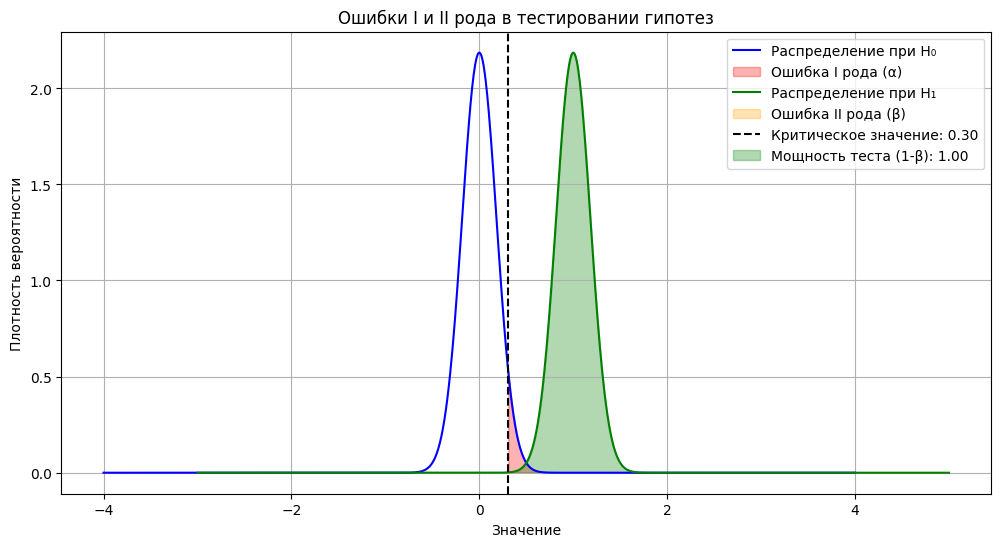

In [8]:
# Визуализация ошибок I и II рода
def plot_error_types(mu0=0, mu1=1, sigma=1, n=30, alpha=0.05):
    # Распределение при H₀
    x0 = np.linspace(mu0 - 4*sigma, mu0 + 4*sigma, 1000)
    y0 = stats.norm.pdf(x0, mu0, sigma/np.sqrt(n))

    # Распределение при H₁
    x1 = np.linspace(mu1 - 4*sigma, mu1 + 4*sigma, 1000)
    y1 = stats.norm.pdf(x1, mu1, sigma/np.sqrt(n))

    # Критическое значение
    critical = stats.norm.ppf(1 - alpha, mu0, sigma/np.sqrt(n))

    plt.figure(figsize=(12, 6))

    # Распределение при H₀
    plt.plot(x0, y0, 'b-', label='Распределение при H₀')
    plt.fill_between(x0, y0, where=(x0 >= critical), color='red', alpha=0.3, label='Ошибка I рода (α)')

    # Распределение при H₁
    plt.plot(x1, y1, 'g-', label='Распределение при H₁')
    plt.fill_between(x1, y1, where=(x1 < critical), color='orange', alpha=0.3, label='Ошибка II рода (β)')

    # Критическое значение
    plt.axvline(critical, color='black', linestyle='--', label=f'Критическое значение: {critical:.2f}')

    # Мощность теста
    power = 1 - stats.norm.cdf(critical, mu1, sigma/np.sqrt(n))
    plt.fill_between(x1, y1, where=(x1 >= critical), color='green', alpha=0.3, label=f'Мощность теста (1-β): {power:.2f}')

    plt.title('Ошибки I и II рода в тестировании гипотез')
    plt.xlabel('Значение')
    plt.ylabel('Плотность вероятности')
    plt.legend()
    plt.grid(True)
    plt.show()

# Визуализация ошибок
plot_error_types(mu0=0, mu1=1, sigma=1, n=30, alpha=0.05)